# heap sort
_implementation and explanation of heap sort_

In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define plt size
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
def new_X():
    """create new random X to be sorted and plot it"""
    global X
    X = np.random.randint(100, size=50)

    sns.barplot(X) 

In [4]:
def plot_binary_tree(array):
    n = len(array)
    
    # Determine the height of the tree for spacing
    height = int(np.floor(np.log2(n))) + 1
    positions = {}  # Store positions for each node

    # Function to recursively find positions of each node
    def get_position(index, depth, x, dx, dy):
        if index >= n:
            return
        positions[index] = (x, -depth * dy)  # Assign x and y position
        # Left child at 2 * index + 1
        get_position(2 * index + 1, depth + 1, x - dx / 2, dx / 2, dy)
        # Right child at 2 * index + 2
        get_position(2 * index + 2, depth + 1, x + dx / 2, dx / 2, dy)

    # Start with root node in the center
    dx = 2 ** height  # Initial horizontal distance
    dy = 2  # Vertical distance multiplier, adjust for vertical spacing
    get_position(0, 0, 0, dx, dy)

    # Plot the nodes and edges
    fig, ax = plt.subplots(figsize=(10, height * dy * 0.7))  # Increase figure height
    ax.set_aspect('auto')
    ax.axis('off')  # Hide the axes

    # Adjust vertical limits to ensure full height
    ax.set_ylim(-height * dy, dy)

    for index, (x, y) in positions.items():
        # Draw the node
        ax.plot(x, y, 'o', color='skyblue', markersize=20)
        ax.text(x, y, str(array[index]), ha='center', va='center', color='black')
        
        # Draw edges to children
        left_index, right_index = 2 * index + 1, 2 * index + 2
        if left_index < n:
            left_x, left_y = positions[left_index]
            ax.plot([x, left_x], [y, left_y], 'k-')
        if right_index < n:
            right_x, right_y = positions[right_index]
            ax.plot([x, right_x], [y, right_y], 'k-')

    plt.show()

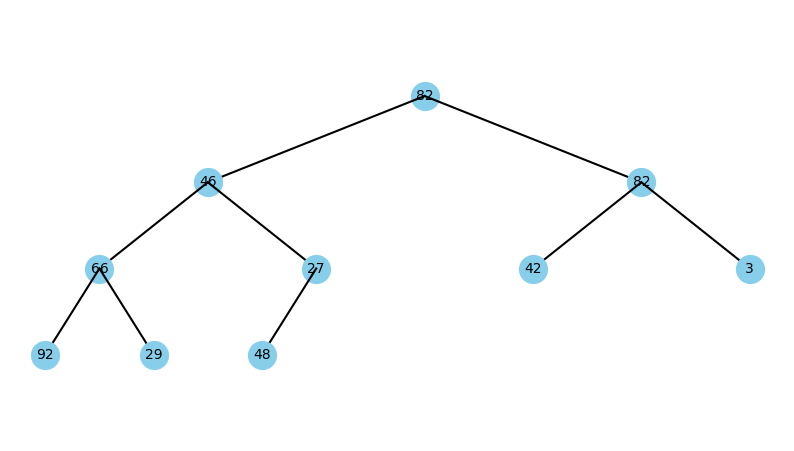

heap before



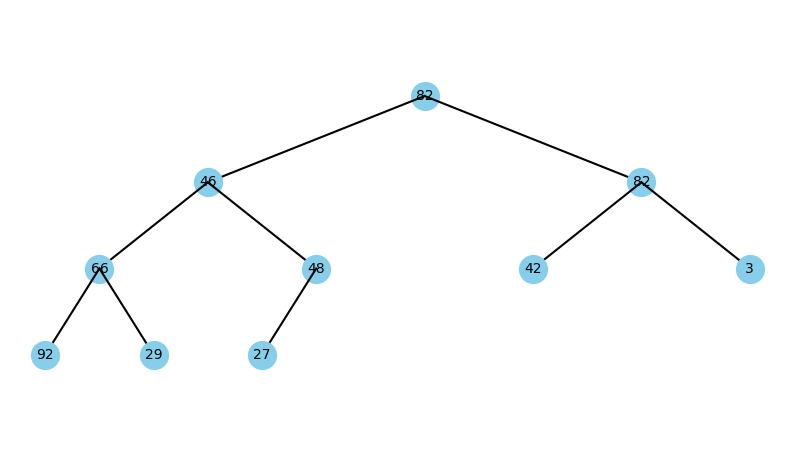

0: after heapify(X=[82 46 82 66 48 42  3 92 29 27], end=9, root=4)



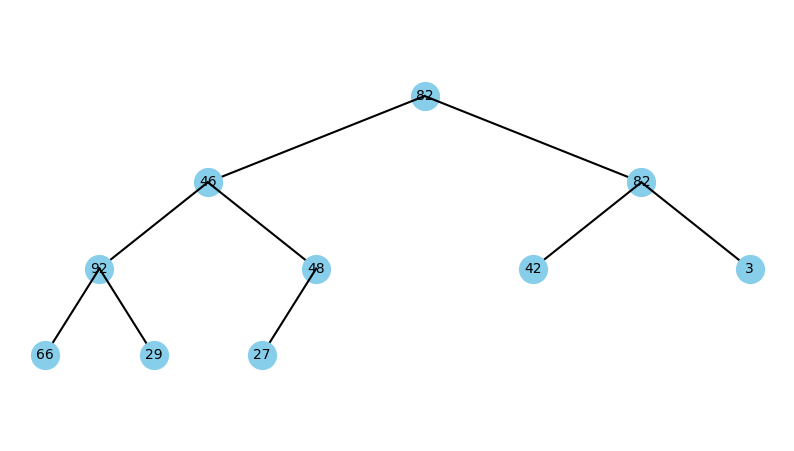

0: after heapify(X=[82 46 82 92 48 42  3 66 29 27], end=9, root=3)



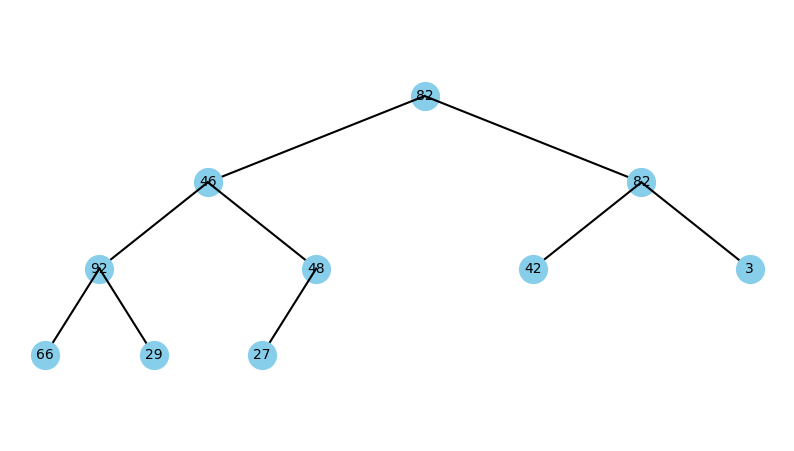

0: after heapify(X=[82 46 82 92 48 42  3 66 29 27], end=9, root=2)



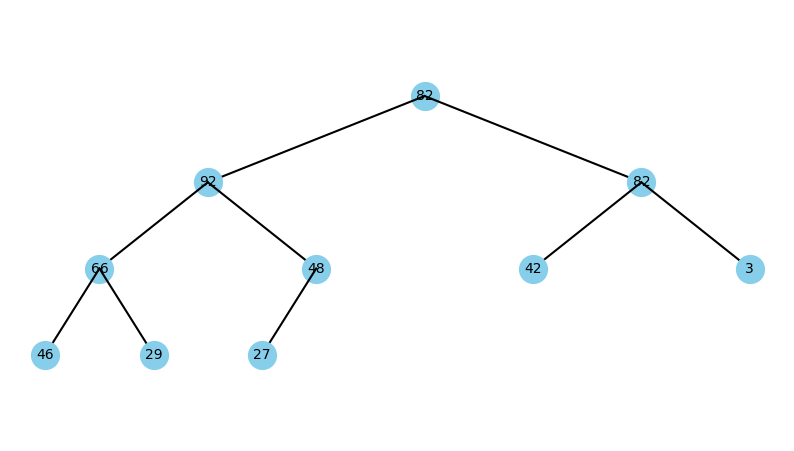

0: after heapify(X=[82 92 82 66 48 42  3 46 29 27], end=9, root=1)



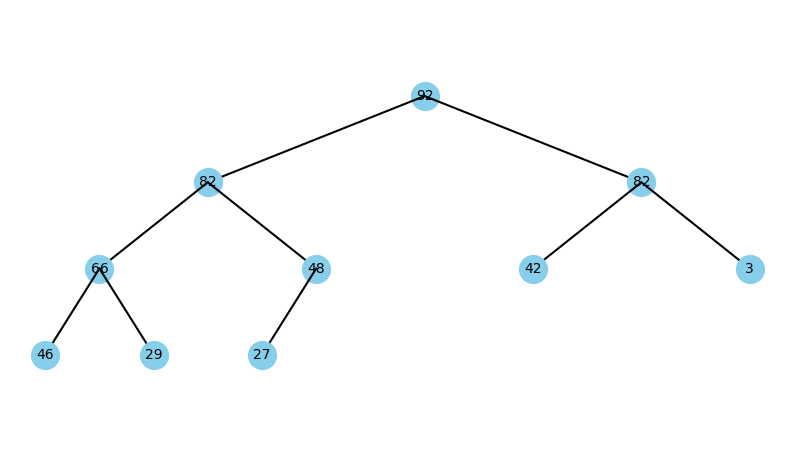

0: after heapify(X=[92 82 82 66 48 42  3 46 29 27], end=9, root=0)

push 27 to top


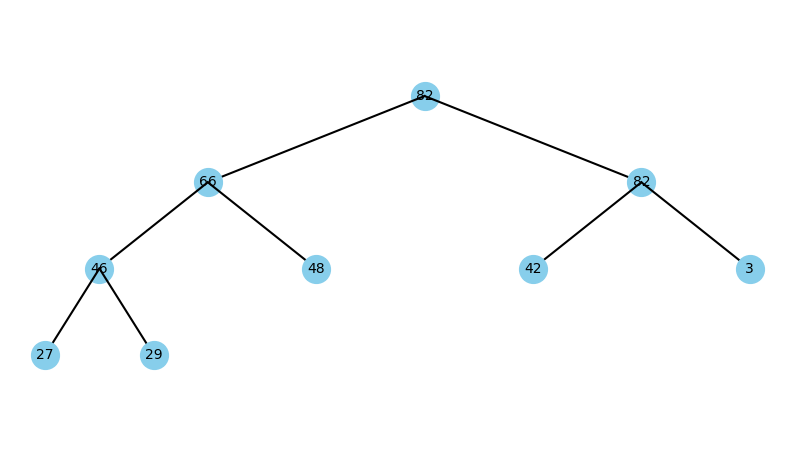

1: after heapify(X=[82 66 82 46 48 42  3 27 29 92], end=8, root=0)

push 29 to top


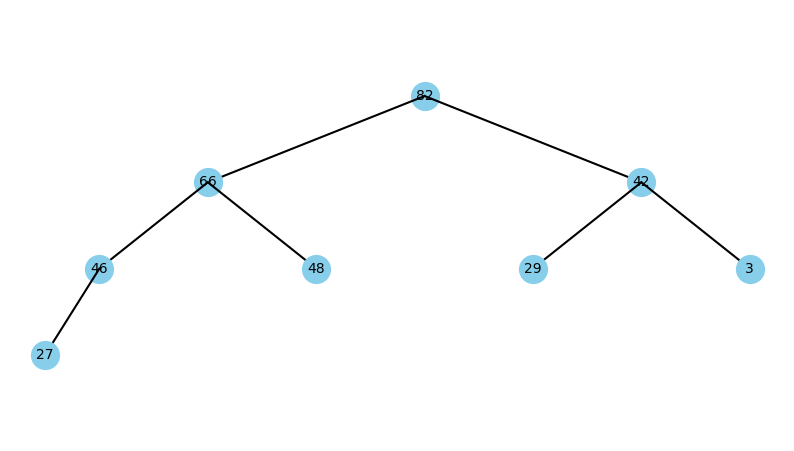

1: after heapify(X=[82 66 42 46 48 29  3 27 82 92], end=7, root=0)

push 27 to top


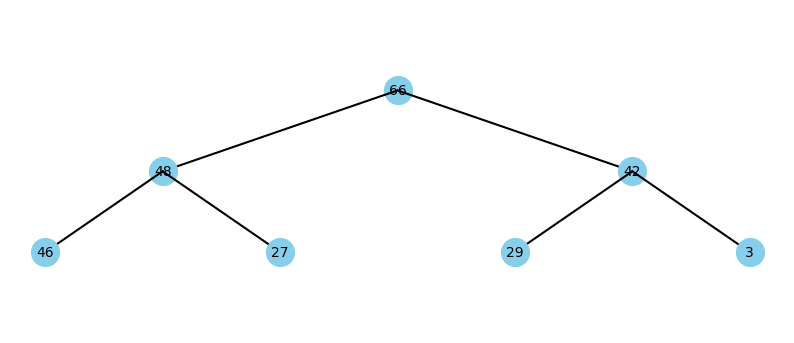

1: after heapify(X=[66 48 42 46 27 29  3 82 82 92], end=6, root=0)

push 3 to top


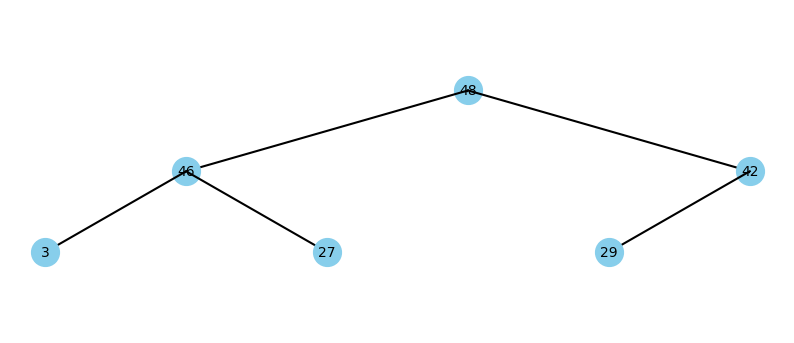

1: after heapify(X=[48 46 42  3 27 29 66 82 82 92], end=5, root=0)

push 29 to top


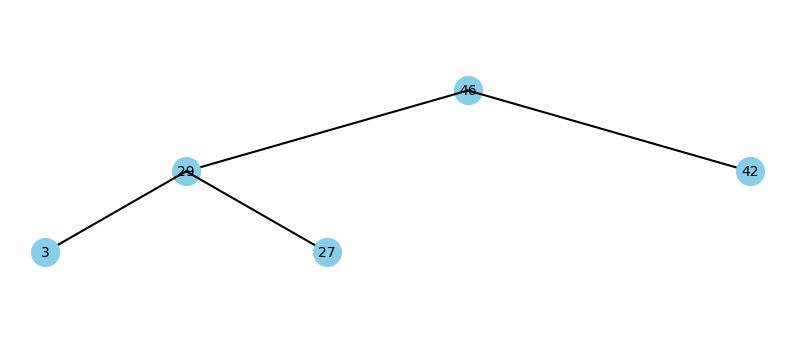

1: after heapify(X=[46 29 42  3 27 48 66 82 82 92], end=4, root=0)

push 27 to top


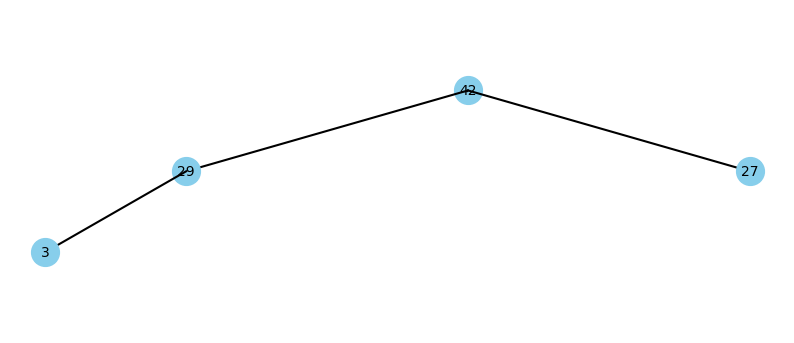

1: after heapify(X=[42 29 27  3 46 48 66 82 82 92], end=3, root=0)

push 3 to top


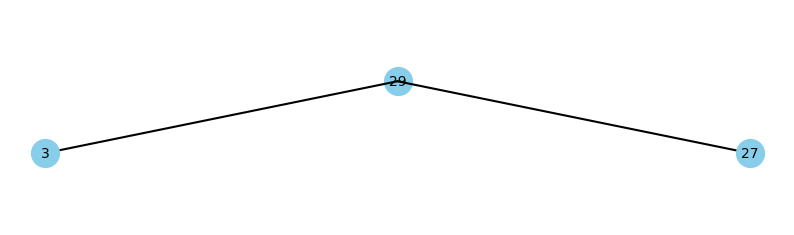

1: after heapify(X=[29  3 27 42 46 48 66 82 82 92], end=2, root=0)

push 27 to top


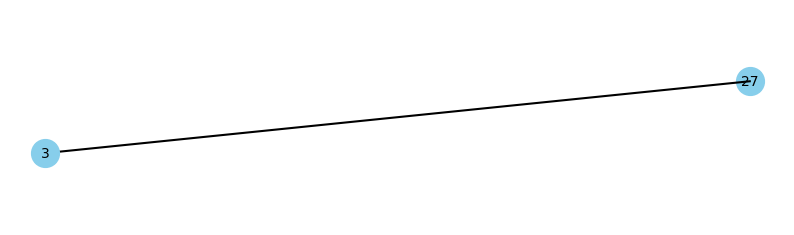

1: after heapify(X=[27  3 29 42 46 48 66 82 82 92], end=1, root=0)

push 3 to top


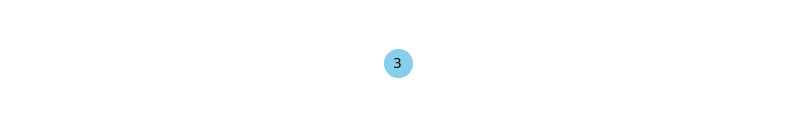

1: after heapify(X=[ 3 27 29 42 46 48 66 82 82 92], end=0, root=0)



In [12]:
X = np.random.randint(100, size=10)

def heapify(X, end, root):
    """
    Ensures the heap property for a subtree rooted at 'root'.
    It assumes that the left and right subtrees are already heapified.
    """
    largest = root  # Initialize largest as root
    left = 2 * root + 1  # Left child index
    right = 2 * root + 2  # Right child index

    # Check if the left child exists and is greater than the root
    if left <= end and X[left] > X[largest]:
        largest = left
    
    # Check if the right child exists and is greater than the largest found so far
    if right <= end and X[right] > X[largest]:
        largest = right

    # If the largest is not root, swap and continue heapifying the affected subtree
    if largest != root:
        X[root], X[largest] = X[largest], X[root]  # Swap root with largest
        heapify(X, end, largest)  # Recursively heapify the affected subtree


def heap_sort(X):
    """
    Sorts the array X using the Heap Sort algorithm.
    First builds a heap and then sorts the array.
    """
    # Start from the last non-leaf node and heapify each node
    plot_binary_tree(X)
    print('heap before\n')
    
    for i in range((len(X) - 2) // 2, -1, -1):
        heapify(X, len(X) - 1, i)
        plot_binary_tree(X)
        print(f'0: after heapify(X={X}, end={len(X)-1}, root={i})\n')
        
    # Extract elements from the heap one by one
    for i in range(len(X) - 1, 0, -1):
        X[0], X[i] = X[i], X[0]  # Swap the current root with the end
        print(f'push {X[0]} to top')
        heapify(X, i - 1, 0)  # Heapify the reduced heap
        plot_binary_tree(X[:i])
        print(f'1: after heapify(X={X}, end={i - 1}, root={0})\n')

heap_sort(X)